In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Merged_DF.csv')

In [3]:
df

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply,Mortgage Interested Rate 30,Job Opening in Construction,CPI
0,"Atlanta, GA",2018-01-01 00:00:00,251000,-0.134,2855,-0.016,4.2,4.0325,250,2.042188
1,"Atlanta, GA",2018-02-01 00:00:00,246000,-0.022,2955,0.035,3.7,4.3300,218,2.175117
2,"Atlanta, GA",2018-03-01 00:00:00,267000,0.088,3073,0.040,2.8,4.4440,223,2.321361
3,"Atlanta, GA",2018-04-01 00:00:00,279000,0.047,3198,0.041,3.2,4.4675,223,2.406737
4,"Atlanta, GA",2018-05-01 00:00:00,295000,0.055,3346,0.046,2.7,4.5860,266,2.725657
...,...,...,...,...,...,...,...,...,...,...
403,"St. Charles, MO",2023-04-01 00:00:00,330000,0.009,69,-0.159,0.8,6.3425,347,4.872060
404,"St. Charles, MO",2023-05-01 00:00:00,338000,0.023,79,0.145,0.8,6.4250,379,3.993678
405,"St. Charles, MO",2023-06-01 00:00:00,335000,-0.007,111,0.405,0.9,6.7140,386,2.971588
406,"St. Charles, MO",2023-07-01 00:00:00,327000,-0.025,109,-0.018,0.9,6.8400,353,3.160709


In [4]:
regions = df['Region'].unique()

In [5]:
regions

array(['Atlanta, GA', 'Marietta, GA', 'Minneapolis, MN', 'Lakeville, MN',
       'St. Louis, MO', 'St. Charles, MO'], dtype=object)

In [9]:
for region in regions:
    regional_df = df[df['Region']==region]
    regional_df.to_csv(f'{region}.csv', index=False)

In [9]:
Atlanta = pd.read_csv('Atlanta, GA.csv')

Marietta = pd.read_csv('Marietta, GA.csv')

Minneapolis = pd.read_csv('Minneapolis, MN.csv')

Lakeville = pd.read_csv('Lakeville, MN.csv')

StLouis = pd.read_csv('St. Louis, MO.csv')

StCharles = pd.read_csv('St. Charles, MO.csv')


# Atlanta, GA

In [7]:
Atlanta

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply,Mortgage Interested Rate 30,Job Opening in Construction,CPI
0,"Atlanta, GA",2018-01-01 00:00:00,251000,-0.134,2855,-0.016,4.2,4.0325,250,2.042188
1,"Atlanta, GA",2018-02-01 00:00:00,246000,-0.022,2955,0.035,3.7,4.3300,218,2.175117
2,"Atlanta, GA",2018-03-01 00:00:00,267000,0.088,3073,0.040,2.8,4.4440,223,2.321361
3,"Atlanta, GA",2018-04-01 00:00:00,279000,0.047,3198,0.041,3.2,4.4675,223,2.406737
4,"Atlanta, GA",2018-05-01 00:00:00,295000,0.055,3346,0.046,2.7,4.5860,266,2.725657
...,...,...,...,...,...,...,...,...,...,...
63,"Atlanta, GA",2023-04-01 00:00:00,399000,0.019,2788,-0.012,3.8,6.3425,347,4.872060
64,"Atlanta, GA",2023-05-01 00:00:00,450000,0.129,2751,-0.013,3.3,6.4250,379,3.993678
65,"Atlanta, GA",2023-06-01 00:00:00,438000,-0.027,2734,-0.006,3.3,6.7140,386,2.971588
66,"Atlanta, GA",2023-07-01 00:00:00,385000,-0.121,2673,-0.022,3.6,6.8400,353,3.160709


In [13]:
# Convert 'Month of Period End' to datetime and extract year and month
Atlanta['Month of Period End'] = pd.to_datetime(Atlanta['Month of Period End'])
Atlanta['Year'] = Atlanta['Month of Period End'].dt.year
Atlanta['Month'] = Atlanta['Month of Period End'].dt.month

# Select relevant features for the model
features = ['Mortgage Interested Rate 30', 'CPI', 'Inventory', 'Year', 'Month']
target = 'Median Sale Price'

# Splitting the data into training and testing sets
X = Atlanta[features]
y = Atlanta[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the Median Sale Prices
y_pred = model.predict(X_test)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2

(24950.20140515263, 0.2511678757378294)

In [15]:
# Training the basic Random Forest model
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the Median Sale Prices
y_pred_rf = rf_model.predict(X_test)

# Evaluating the basic Random Forest model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf

(17836.0713963906, 0.6173208859866084)

In [16]:
from sklearn.model_selection import GridSearchCV

# Setting up a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at a leaf node
}

# Creating the Grid Search with Random Forest model
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Performing the grid search
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [17]:
# Training the basic Random Forest model
best_rf_model = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators= 50)
best_rf_model.fit(X_train, y_train)

# Predicting the Median Sale Prices
y_pred_best_rf_model = best_rf_model.predict(X_test)

# Evaluating the basic Random Forest model
rmse_best_rf_model = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_best_rf_model = r2_score(y_test, y_pred_rf)

rmse_best_rf_model, r2_best_rf_model

(17836.0713963906, 0.6173208859866084)

In [18]:
# Calculating the average of recent months for each predictor
# We'll use the average of the last 3 months as a reasonable estimate for the future months

recent_data = Atlanta.tail(3)  # Last 3 months of data
avg_interest_rate = recent_data['Mortgage Interested Rate 30'].mean()
avg_cpi = recent_data['CPI'].mean()
avg_inventory = recent_data['Inventory'].mean()

# Assuming the year and month for the next four months
# We'll take the last date from the dataset and increment months
last_date = Atlanta['Month of Period End'].iloc[-1]
forecast_months = pd.date_range(start=last_date, periods=4, freq='M')[1:]  # Skipping the first month as it's the last in the dataset

# Creating a DataFrame for the forecast months
forecast_data = pd.DataFrame({
    'Month of Period End': forecast_months,
    'Mortgage Interested Rate 30': avg_interest_rate,
    'CPI': avg_cpi,
    'Inventory': avg_inventory
})

# Extracting year and month for the forecast data
forecast_data['Year'] = forecast_data['Month of Period End'].dt.year
forecast_data['Month'] = forecast_data['Month of Period End'].dt.month

# Selecting the features for prediction
forecast_features = forecast_data[features]

# Making predictions for the next four months
forecasted_prices = rf_model.predict(forecast_features)

# Adding predictions to the forecast data
forecast_data['Predicted Median Sale Price'] = forecasted_prices
forecast_data[['Month of Period End', 'Predicted Median Sale Price']]


,Month of Period End,Predicted Median Sale Price
0,2023-09-30,413630.0
1,2023-10-31,414150.0
2,2023-11-30,413860.0
3,2023-12-31,413870.0
4,2024-01-31,426810.0
5,2024-02-29,426810.0


In [20]:
# Combining the actual and forecasted data for plotting
combined_data = pd.concat([Atlanta, forecast_data])

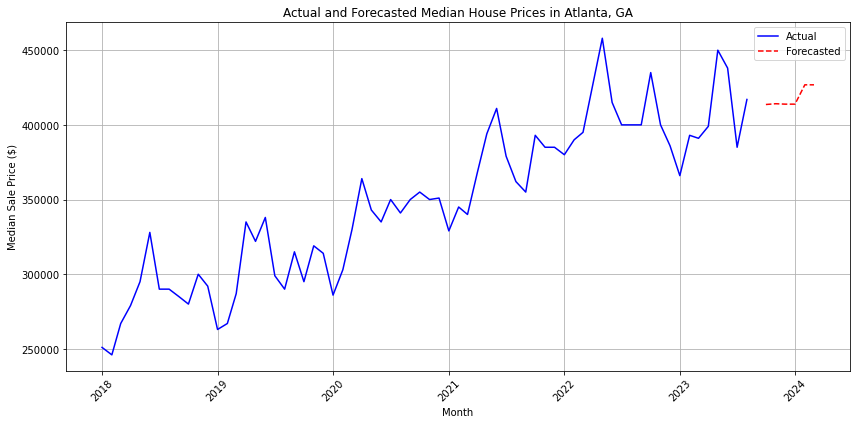

In [23]:
# Plotting the actual and forecasted median sale prices
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Month of Period End'], combined_data['Median Sale Price'], label='Actual', color='blue')
plt.plot(forecast_data['Month of Period End'], forecast_data['Predicted Median Sale Price'], label='Forecasted', color='red', linestyle='--')
plt.title('Actual and Forecasted Median House Prices in Atlanta, GA')
plt.xlabel('Month')
plt.ylabel('Median Sale Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Marietta, GA

In [24]:
Marietta

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply,Mortgage Interested Rate 30,Job Opening in Construction,CPI
0,"Marietta, GA",2018-01-01 00:00:00,265000,0.000,413,-0.053,3.6,4.0325,250,2.042188
1,"Marietta, GA",2018-02-01 00:00:00,256000,-0.035,379,-0.082,2.8,4.3300,218,2.175117
2,"Marietta, GA",2018-03-01 00:00:00,290000,0.134,435,0.148,2.2,4.4440,223,2.321361
3,"Marietta, GA",2018-04-01 00:00:00,292000,0.005,482,0.108,2.5,4.4675,223,2.406737
4,"Marietta, GA",2018-05-01 00:00:00,297000,0.017,545,0.131,2.5,4.5860,266,2.725657
...,...,...,...,...,...,...,...,...,...,...
63,"Marietta, GA",2023-04-01 00:00:00,425000,0.023,181,0.023,1.4,6.3425,347,4.872060
64,"Marietta, GA",2023-05-01 00:00:00,424000,-0.003,206,0.138,1.3,6.4250,379,3.993678
65,"Marietta, GA",2023-06-01 00:00:00,442000,0.045,242,0.175,1.8,6.7140,386,2.971588
66,"Marietta, GA",2023-07-01 00:00:00,470000,0.062,247,0.021,1.9,6.8400,353,3.160709


In [25]:
# Convert 'Month of Period End' to datetime and extract year and month
Marietta['Month of Period End'] = pd.to_datetime(Marietta['Month of Period End'])
Marietta['Year'] = Marietta['Month of Period End'].dt.year
Marietta['Month'] = Marietta['Month of Period End'].dt.month

# Select relevant features for the model
features = ['Mortgage Interested Rate 30', 'CPI', 'Inventory', 'Year', 'Month']
target = 'Median Sale Price'

# Splitting the data into training and testing sets
X = Marietta[features]
y = Marietta[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# Training the basic Random Forest model
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the Median Sale Prices
y_pred_rf = rf_model.predict(X_test)

# Evaluating the basic Random Forest model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf

(13939.700498934688, 0.9101056970824197)

In [28]:
from sklearn.model_selection import GridSearchCV

# Setting up a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at a leaf node
}

# Creating the Grid Search with Random Forest model
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Performing the grid search
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [29]:
# Training the basic Random Forest model
best_rf_model = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators= 100)
best_rf_model.fit(X_train, y_train)

# Predicting the Median Sale Prices
y_pred_best_rf_model = best_rf_model.predict(X_test)

# Evaluating the basic Random Forest model
rmse_best_rf_model = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_best_rf_model = r2_score(y_test, y_pred_rf)

rmse_best_rf_model, r2_best_rf_model

(13939.700498934688, 0.9101056970824197)

In [33]:
# Calculating the average of recent months for each predictor
# We'll use the average of the last 3 months as a reasonable estimate for the future months

recent_data = Marietta.tail(3)  # Last 3 months of data
avg_interest_rate = recent_data['Mortgage Interested Rate 30'].mean()
avg_cpi = recent_data['CPI'].mean()
avg_inventory = recent_data['Inventory'].mean()

# Assuming the year and month for the next six months
# We'll take the last date from the dataset and increment months
last_date = Marietta['Month of Period End'].iloc[-1]
forecast_months = pd.date_range(start=last_date, periods=7, freq='M')[1:]  # Skipping the first month as it's the last in the dataset

# Creating a DataFrame for the forecast months
forecast_data = pd.DataFrame({
    'Month of Period End': forecast_months,
    'Mortgage Interested Rate 30': avg_interest_rate,
    'CPI': avg_cpi,
    'Inventory': avg_inventory
})

# Extracting year and month for the forecast data
forecast_data['Year'] = forecast_data['Month of Period End'].dt.year
forecast_data['Month'] = forecast_data['Month of Period End'].dt.month

# Selecting the features for prediction
forecast_features = forecast_data[features]

# Making predictions for the next four months
forecasted_prices = rf_model.predict(forecast_features)

# Adding predictions to the forecast data
forecast_data['Predicted Median Sale Price'] = forecasted_prices
forecast_data[['Month of Period End', 'Predicted Median Sale Price']]


,Month of Period End,Predicted Median Sale Price
0,2023-09-30,422610.0
1,2023-10-31,416560.0
2,2023-11-30,416140.0
3,2023-12-31,416440.0
4,2024-01-31,421230.0
5,2024-02-29,421230.0


In [31]:
# Combining the actual and forecasted data for plotting
combined_data = pd.concat([Marietta, forecast_data])

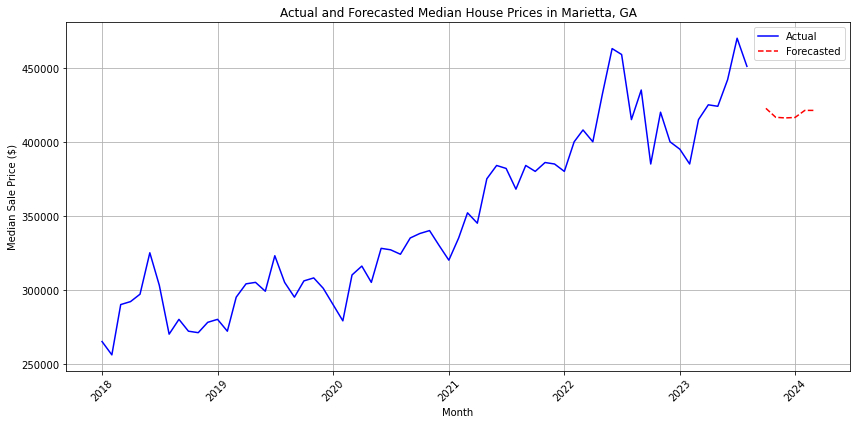

In [34]:
# Plotting the actual and forecasted median sale prices
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Month of Period End'], combined_data['Median Sale Price'], label='Actual', color='blue')
plt.plot(forecast_data['Month of Period End'], forecast_data['Predicted Median Sale Price'], label='Forecasted', color='red', linestyle='--')
plt.title('Actual and Forecasted Median House Prices in Marietta, GA')
plt.xlabel('Month')
plt.ylabel('Median Sale Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Minneapolis, MN

In [35]:
Minneapolis

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply,Mortgage Interested Rate 30,Job Opening in Construction,CPI
0,"Minneapolis, MN",2018-01-01 00:00:00,244000,0.016,654,-0.041,1.8,4.0325,250,2.042188
1,"Minneapolis, MN",2018-02-01 00:00:00,249000,0.021,702,0.073,2.0,4.3300,218,2.175117
2,"Minneapolis, MN",2018-03-01 00:00:00,263000,0.056,846,0.205,1.5,4.4440,223,2.321361
3,"Minneapolis, MN",2018-04-01 00:00:00,275000,0.046,958,0.132,1.6,4.4675,223,2.406737
4,"Minneapolis, MN",2018-05-01 00:00:00,277000,0.006,1131,0.181,1.6,4.5860,266,2.725657
...,...,...,...,...,...,...,...,...,...,...
63,"Minneapolis, MN",2023-04-01 00:00:00,344000,0.091,849,0.053,1.8,6.3425,347,4.872060
64,"Minneapolis, MN",2023-05-01 00:00:00,341000,-0.007,941,0.108,1.7,6.4250,379,3.993678
65,"Minneapolis, MN",2023-06-01 00:00:00,340000,-0.003,991,0.053,1.4,6.7140,386,2.971588
66,"Minneapolis, MN",2023-07-01 00:00:00,345000,0.015,986,-0.005,1.6,6.8400,353,3.160709


In [36]:
# Convert 'Month of Period End' to datetime and extract year and month
Minneapolis['Month of Period End'] = pd.to_datetime(Marietta['Month of Period End'])
Minneapolis['Year'] = Minneapolis['Month of Period End'].dt.year
Minneapolis['Month'] = Minneapolis['Month of Period End'].dt.month

# Select relevant features for the model
features = ['Mortgage Interested Rate 30', 'CPI', 'Inventory', 'Year', 'Month']
target = 'Median Sale Price'

# Splitting the data into training and testing sets
X = Minneapolis[features]
y = Minneapolis[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
# Training the basic Random Forest model
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the Median Sale Prices
y_pred_rf = rf_model.predict(X_test)

# Evaluating the basic Random Forest model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf

(10414.528656778335, 0.7241861046240075)

In [38]:
# Calculating the average of recent months for each predictor
# We'll use the average of the last 3 months as a reasonable estimate for the future months

recent_data = Minneapolis.tail(3)  # Last 3 months of data
avg_interest_rate = recent_data['Mortgage Interested Rate 30'].mean()
avg_cpi = recent_data['CPI'].mean()
avg_inventory = recent_data['Inventory'].mean()

# Assuming the year and month for the next six months
# We'll take the last date from the dataset and increment months
last_date = Minneapolis['Month of Period End'].iloc[-1]
forecast_months = pd.date_range(start=last_date, periods=7, freq='M')[1:]  # Skipping the first month as it's the last in the dataset

# Creating a DataFrame for the forecast months
forecast_data = pd.DataFrame({
    'Month of Period End': forecast_months,
    'Mortgage Interested Rate 30': avg_interest_rate,
    'CPI': avg_cpi,
    'Inventory': avg_inventory
})

# Extracting year and month for the forecast data
forecast_data['Year'] = forecast_data['Month of Period End'].dt.year
forecast_data['Month'] = forecast_data['Month of Period End'].dt.month

# Selecting the features for prediction
forecast_features = forecast_data[features]

# Making predictions for the next four months
forecasted_prices = rf_model.predict(forecast_features)

# Adding predictions to the forecast data
forecast_data['Predicted Median Sale Price'] = forecasted_prices
forecast_data[['Month of Period End', 'Predicted Median Sale Price']]


,Month of Period End,Predicted Median Sale Price
0,2023-09-30,330330.0
1,2023-10-31,329240.0
2,2023-11-30,322730.0
3,2023-12-31,320480.0
4,2024-01-31,333050.0
5,2024-02-29,333050.0


In [39]:
# Combining the actual and forecasted data for plotting
combined_data = pd.concat([Minneapolis, forecast_data])

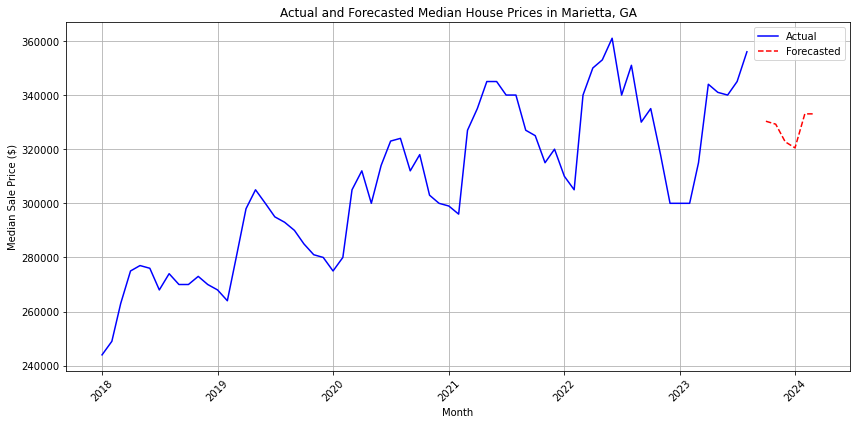

In [40]:
# Plotting the actual and forecasted median sale prices
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Month of Period End'], combined_data['Median Sale Price'], label='Actual', color='blue')
plt.plot(forecast_data['Month of Period End'], forecast_data['Predicted Median Sale Price'], label='Forecasted', color='red', linestyle='--')
plt.title('Actual and Forecasted Median House Prices in Marietta, GA')
plt.xlabel('Month')
plt.ylabel('Median Sale Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Lakeville, MN

In [41]:
Lakeville

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply,Mortgage Interested Rate 30,Job Opening in Construction,CPI
0,"Lakeville, MN",2018-01-01 00:00:00,338000,-0.016,210,0.034,4.2,4.0325,250,2.042188
1,"Lakeville, MN",2018-02-01 00:00:00,355000,0.049,230,0.095,3.4,4.3300,218,2.175117
2,"Lakeville, MN",2018-03-01 00:00:00,350000,-0.014,244,0.061,2.6,4.4440,223,2.321361
3,"Lakeville, MN",2018-04-01 00:00:00,334000,-0.046,210,-0.139,1.7,4.4675,223,2.406737
4,"Lakeville, MN",2018-05-01 00:00:00,365000,0.093,246,0.171,1.7,4.5860,266,2.725657
...,...,...,...,...,...,...,...,...,...,...
63,"Lakeville, MN",2023-04-01 00:00:00,432000,-0.117,220,0.063,2.6,6.3425,347,4.872060
64,"Lakeville, MN",2023-05-01 00:00:00,451000,0.043,222,0.009,2.2,6.4250,379,3.993678
65,"Lakeville, MN",2023-06-01 00:00:00,487000,0.080,236,0.063,2.0,6.7140,386,2.971588
66,"Lakeville, MN",2023-07-01 00:00:00,475000,-0.025,244,0.034,2.1,6.8400,353,3.160709


In [42]:
# Convert 'Month of Period End' to datetime and extract year and month
Lakeville['Month of Period End'] = pd.to_datetime(Marietta['Month of Period End'])
Lakeville['Year'] = Lakeville['Month of Period End'].dt.year
Lakeville['Month'] = Lakeville['Month of Period End'].dt.month

# Select relevant features for the model
features = ['Mortgage Interested Rate 30', 'CPI', 'Inventory', 'Year', 'Month']
target = 'Median Sale Price'

# Splitting the data into training and testing sets
X = Lakeville[features]
y = Lakeville[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the basic Random Forest model
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the Median Sale Prices
y_pred_rf = rf_model.predict(X_test)

# Evaluating the basic Random Forest model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf

(22736.670035115396, 0.7730352751171522)

In [59]:
# Calculating the average of recent months for each predictor
# We'll use the average of the last 3 months as a reasonable estimate for the future months

recent_data = Lakeville.tail(5)  # Last 3 months of data
avg_interest_rate = recent_data['Mortgage Interested Rate 30'].mean()
avg_cpi = recent_data['CPI'].mean()
avg_inventory = recent_data['Inventory'].mean()

# Assuming the year and month for the next six months
# We'll take the last date from the dataset and increment months
last_date = Lakeville['Month of Period End'].iloc[-1]
forecast_months = pd.date_range(start=last_date, periods=7, freq='M')[1:]  # Skipping the first month as it's the last in the dataset

# Creating a DataFrame for the forecast months
forecast_data = pd.DataFrame({
    'Month of Period End': forecast_months,
    'Mortgage Interested Rate 30': avg_interest_rate,
    'CPI': avg_cpi,
    'Inventory': avg_inventory
})

# Extracting year and month for the forecast data
forecast_data['Year'] = forecast_data['Month of Period End'].dt.year
forecast_data['Month'] = forecast_data['Month of Period End'].dt.month

# Selecting the features for prediction
forecast_features = forecast_data[features]

# Making predictions for the next four months
forecasted_prices = rf_model.predict(forecast_features)

# Adding predictions to the forecast data
forecast_data['Predicted Median Sale Price'] = forecasted_prices
forecast_data[['Month of Period End', 'Predicted Median Sale Price']]

,Month of Period End,Predicted Median Sale Price
0,2023-09-30,471620.0
1,2023-10-31,471860.0
2,2023-11-30,471860.0
3,2023-12-31,472920.0
4,2024-01-31,470500.0
5,2024-02-29,470500.0


In [60]:
# Combining the actual and forecasted data for plotting
combined_data = pd.concat([Lakeville, forecast_data])

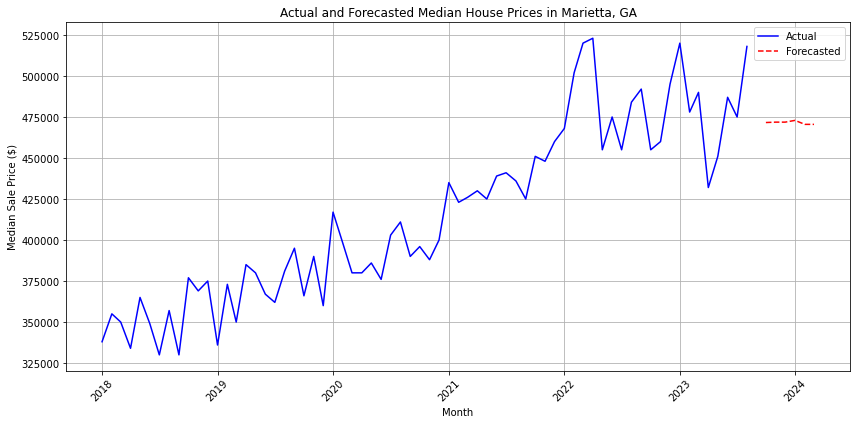

In [61]:
# Plotting the actual and forecasted median sale prices
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Month of Period End'], combined_data['Median Sale Price'], label='Actual', color='blue')
plt.plot(forecast_data['Month of Period End'], forecast_data['Predicted Median Sale Price'], label='Forecasted', color='red', linestyle='--')
plt.title('Actual and Forecasted Median House Prices in Marietta, GA')
plt.xlabel('Month')
plt.ylabel('Median Sale Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()